1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k. 

2*. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

### Реализация алгоритма kNN<a class='anchor' id='implement_knn'>

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

Загрузка датасета

In [102]:
X, y = load_iris(return_X_y=True)

# Возьму только первые 2 признака из 4-х 
X = X[:, :2]

Разделение выборки на обучающую и тестовую

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

Посмотрю на кластеры в цветах

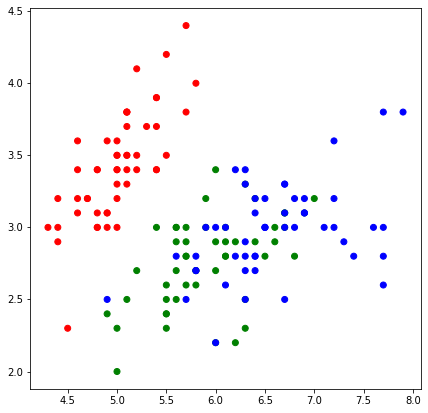

In [104]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [105]:
def get_metrics(x1, x2):
  """
  Функция вычисляет евклидово расстояние
  """
  dots = np.linspace(0, 10, 100)
  q = 0.5
  value = list(map(lambda d: q ** d, dots))
  
  return np.sqrt(np.sum(np.square(x1 - x2)))

In [106]:
def get_knn(X_train, y_train, X_test, k):
    """
    Функция поиска k-ближайших соседей
    """
    answers = []
    for x in X_test:
        test_distances = []
            
        for i in range(len(X_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = get_metrics(x, X_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k-элементов подсчитаем частоту появления разных классов
        numeric = 1
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1 / numeric
            numeric += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [107]:
def get_accuracy(pred, y):
  """
  Функция для вычисления точности
  """
  return sum(pred == y) / len(y)

In [108]:
def get_graph(X_train, y_train, k):
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

  h = .1

  # Расчет пределов графика
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  print(np.c_[xx.ravel(), yy.ravel()].shape)

  # Получим предсказания для всех точек
  Z = get_knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

  # Построим график
  Z = np.array(Z).reshape(xx.shape)
  plt.figure(figsize=(7,7))
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Добавим на график обучающую выборку
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f"Трехклассовая kNN классификация при k = {k}")
  plt.show()

Проверим работу алгоритма при различных k

In [109]:
k = 2
y_pred = get_knn(X_train, y_train, X_test, k)

print(f'k = {k}\nAccuracy = {get_accuracy(y_pred, y_test):.3f}')

k = 2
Accuracy = 0.700


(2352, 2)


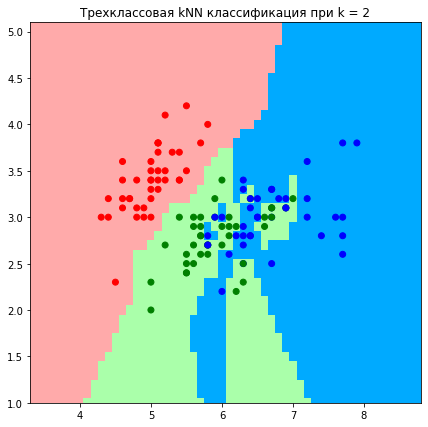

CPU times: user 31 s, sys: 1.86 s, total: 32.9 s
Wall time: 29.7 s


In [110]:
%%time
get_graph(X_train, y_train, k)

In [111]:
k = 3
y_pred = get_knn(X_train, y_train, X_test, k)

print(f'k = {k}\nAccuracy = {get_accuracy(y_pred, y_test):.3f}')

k = 3
Accuracy = 0.700


(2352, 2)


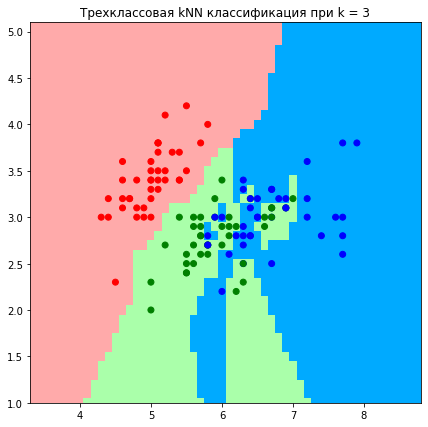

CPU times: user 30.9 s, sys: 1.86 s, total: 32.7 s
Wall time: 30 s


In [112]:
%%time
get_graph(X_train, y_train, k)

In [113]:
k = 5
y_pred = get_knn(X_train, y_train, X_test, k)

print(f'k = {k}\nAccuracy = {get_accuracy(y_pred, y_test):.3f}')

k = 5
Accuracy = 0.700


(2352, 2)


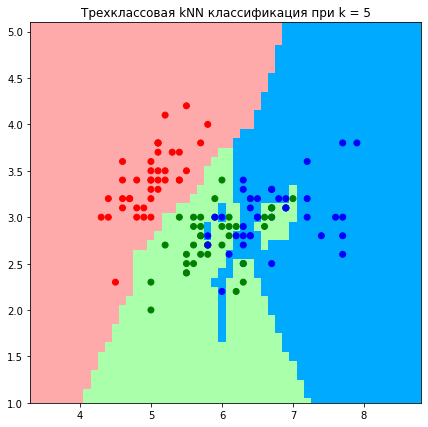

CPU times: user 31.6 s, sys: 2.01 s, total: 33.6 s
Wall time: 30.3 s


In [114]:
%%time
get_graph(X_train, y_train, k)

In [115]:
k = 10
y_pred = get_knn(X_train, y_train, X_test, k)

print(f'k = {k}\nAccuracy = {get_accuracy(y_pred, y_test):.3f}')

k = 10
Accuracy = 0.733


(2352, 2)


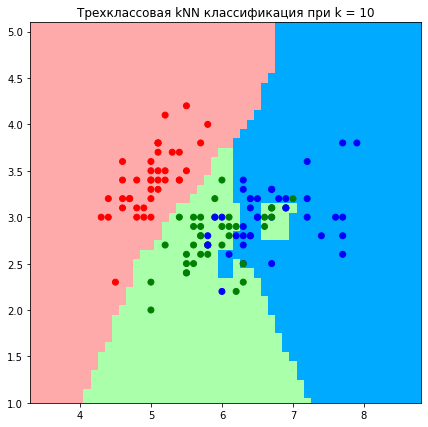

CPU times: user 32.2 s, sys: 2.14 s, total: 34.3 s
Wall time: 30.9 s


In [116]:
%%time
get_graph(X_train, y_train, k)

**Обучение без учителя. Кластеризация. K-means**

In [117]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=50, noise=0.02, random_state=1)

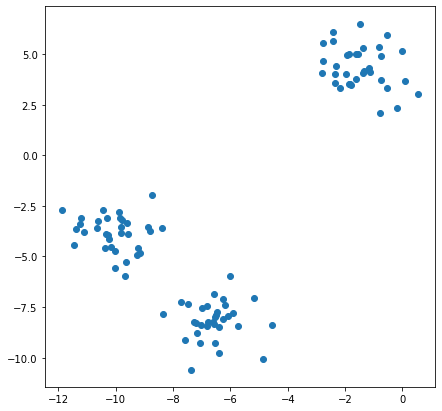

In [118]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [119]:
def kmeans(data, k, max_iterations, min_distance):
  # Создадим словарь для кластеризации
  clusters = {i: [] for i in range(k)}
  
  # инициализируем центроиды как первые k элементов датасета
  centroids = [data[i] for i in range(k)]
  
  for _ in range(max_iterations):
    # кластеризуем объекты по центроидам
    for x in data:
      # определим расстояния от объекта до каждого центроида
      distances = [get_metrics(x, centroid) for centroid in centroids]
      # отнесем объект к кластеру, до центроида которого наименьшее расстояние
      cluster = distances.index(min(distances))
      clusters[cluster].append(x)
    
    # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
    old_centroids = centroids.copy()
    
    # пересчитаем центроиды как среднее по кластерам
    for cluster in clusters:
      centroids[cluster] = np.mean(clusters[cluster], axis=0)
        
    # сравним величину смещения центроидов с минимальной
    optimal = True
    for centroid in range(len(centroids)):
      if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
        optimal = False
        break
    
    # если все смещения меньше минимального, останавливаем алгоритм  
    if optimal:
      break
  
  return old_centroids, clusters

In [120]:
def calc_in_metric(centroids, clusters, n):
  """
  Функция вычисляет среднее квадратичное внутрикластерное расстояние
  """

  all_sum_sqared_distances = 0
  all_count = n

  for centroid in range(len(centroids)):
    # print(f'{centroid + 1} центроид:')

    sum_of_squared_distances = 0

    for cluster in range(len(clusters[centroid])):
      sum_of_squared_distances += (np.linalg.norm(centroids[centroid] - clusters[centroid][cluster], ord=2)) ** 2
    print(f'Сумма квадратов расстояний в {centroid + 1} центроиде', sum_of_squared_distances)

    all_sum_sqared_distances += sum_of_squared_distances

  print(f'Сумма квадратов расстояний во всех центроидах', all_sum_sqared_distances)
  print('\nВсего кластеров:', len(centroids) )
  print('Общее количество элементов в кластерах:', all_count)
  print(f'Среднее квадратичное внутрикластерное расстояние {all_sum_sqared_distances / all_count:.4f}')
  
  return all_sum_sqared_distances / all_count

In [121]:
def visualize(centroids, clusters):
  colors = ['red', 'gray', 'brown', 'orange', 'purple', 'olive', 'cyan', 'pink', 'green', 'blue']
  
  plt.figure(figsize=(7,7))
  
  # нанесем на график центроиды
  for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
      
  # нанесем объекты раскрашенные по классам
  for cluster_item in clusters:
    for x in clusters[cluster_item]:
      plt.scatter(x[0], x[1], color=colors[cluster_item])
          
  plt.show()

In [122]:
# определим максимальное количество итераций
max_iterations = 5

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 1

n = X.shape[0]

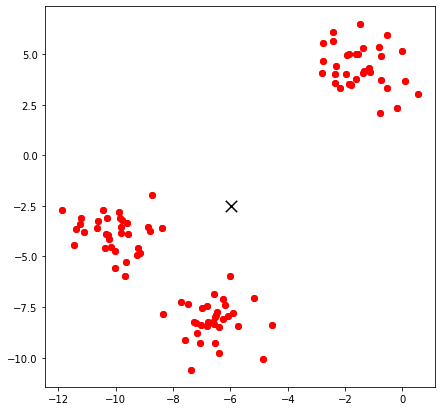

CPU times: user 2.51 s, sys: 58.9 ms, total: 2.57 s
Wall time: 2.64 s


In [123]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [124]:
sum_sqared_distances = calc_in_metric(centroids, clusters, n)

Сумма квадратов расстояний в 1 центроиде 8236.307555408945
Сумма квадратов расстояний во всех центроидах 8236.307555408945

Всего кластеров: 1
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 82.3631


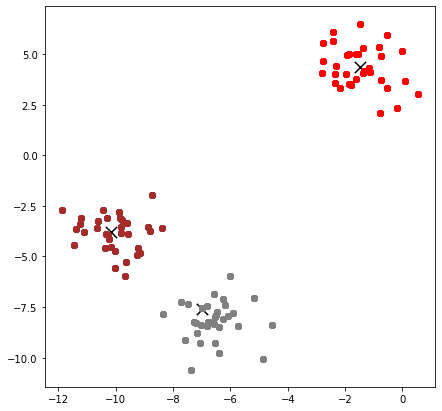

CPU times: user 5.33 s, sys: 179 ms, total: 5.51 s
Wall time: 5.36 s


In [125]:
%%time
max_iterations = 5
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [126]:
sum_sqared_distances = calc_in_metric(centroids, clusters, n)

Сумма квадратов расстояний в 1 центроиде 300.8585154661971
Сумма квадратов расстояний в 2 центроиде 737.1878217267932
Сумма квадратов расстояний в 3 центроиде 200.94108899470774
Сумма квадратов расстояний во всех центроидах 1238.9874261876982

Всего кластеров: 3
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 12.3899


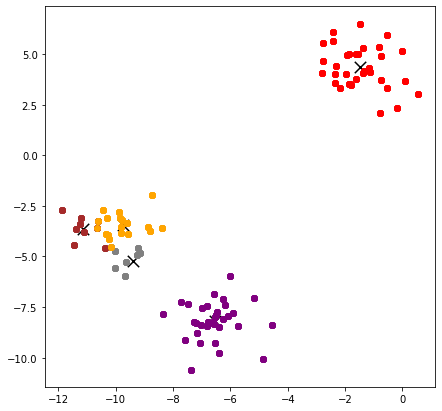

CPU times: user 6.39 s, sys: 131 ms, total: 6.52 s
Wall time: 6.43 s


In [127]:
%%time
max_iterations = 5
min_distance = 1e-4
k = 5

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [128]:
sum_sqared_distances = calc_in_metric(centroids, clusters, n)

Сумма квадратов расстояний в 1 центроиде 300.8585154661971
Сумма квадратов расстояний в 2 центроиде 47.0142742092296
Сумма квадратов расстояний в 3 центроиде 20.986822401813207
Сумма квадратов расстояний в 4 центроиде 57.84034187451516
Сумма квадратов расстояний в 5 центроиде 236.9979626021963
Сумма квадратов расстояний во всех центроидах 663.6979165539514

Всего кластеров: 5
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 6.6370


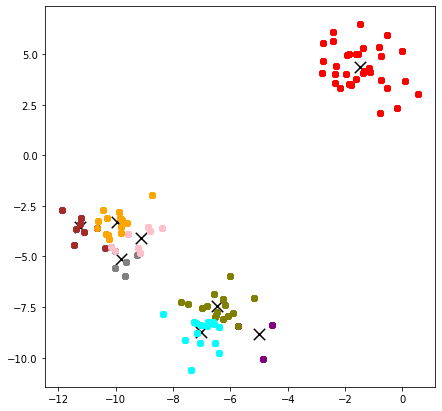

CPU times: user 5.27 s, sys: 126 ms, total: 5.4 s
Wall time: 5.26 s


In [129]:
%%time
max_iterations = 5
min_distance = 1e-4
k = 8

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [130]:
sum_sqared_distances = calc_in_metric(centroids, clusters, n)

Сумма квадратов расстояний в 1 центроиде 300.8585154661971
Сумма квадратов расстояний в 2 центроиде 12.06251270438127
Сумма квадратов расстояний в 3 центроиде 14.510281245410404
Сумма квадратов расстояний в 4 центроиде 37.61358715458316
Сумма квадратов расстояний в 5 центроиде 15.470053551985915
Сумма квадратов расстояний в 6 центроиде 48.58624934080009
Сумма квадратов расстояний в 7 центроиде 56.161570174355155
Сумма квадратов расстояний в 8 центроиде 14.615443816768453
Сумма квадратов расстояний во всех центроидах 499.87821345448157

Всего кластеров: 8
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 4.9988


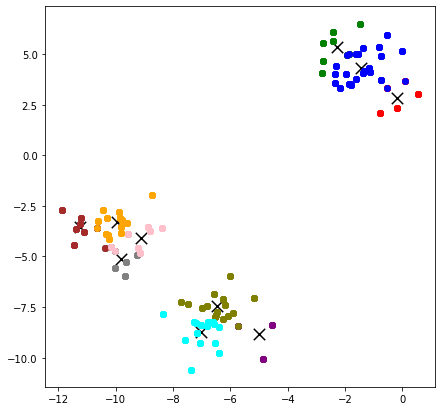

CPU times: user 6.53 s, sys: 149 ms, total: 6.68 s
Wall time: 6.59 s


In [131]:
%%time
max_iterations = 5
min_distance = 1e-4
k = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [132]:
sum_sqared_distances = calc_in_metric(centroids, clusters, n)

Сумма квадратов расстояний в 1 центроиде 12.671444864363556
Сумма квадратов расстояний в 2 центроиде 12.06251270438127
Сумма квадратов расстояний в 3 центроиде 14.510281245410404
Сумма квадратов расстояний в 4 центроиде 37.61358715458316
Сумма квадратов расстояний в 5 центроиде 15.470053551985915
Сумма квадратов расстояний в 6 центроиде 48.58624934080009
Сумма квадратов расстояний в 7 центроиде 56.161570174355155
Сумма квадратов расстояний в 8 центроиде 14.615443816768453
Сумма квадратов расстояний в 9 центроиде 32.263358585001676
Сумма квадратов расстояний в 10 центроиде 100.29150998989799
Сумма квадратов расстояний во всех центроидах 344.2460114275476

Всего кластеров: 10
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 3.4425


In [133]:
list_k = [1, 3, 5, 8, 10]
max_iterations = 5
min_distance = 1e-4

In [139]:
def prepare_to_graph(list_k, max_iterations, min_distance):
  """
  Функция подготавливает список среднее квадратичных внутрикластерных расстояний
  """
  list_sum = []
  for k in list_k:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    sum_sqared_distances = calc_in_metric(centroids, clusters, n)
    list_sum.append(sum_sqared_distances)
  return list_sum

In [140]:
list_sum = prepare_to_graph(list_k, max_iterations, min_distance)

Сумма квадратов расстояний в 1 центроиде 8236.307555408945
Сумма квадратов расстояний во всех центроидах 8236.307555408945

Всего кластеров: 1
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 82.3631
Сумма квадратов расстояний в 1 центроиде 300.8585154661971
Сумма квадратов расстояний в 2 центроиде 737.1878217267932
Сумма квадратов расстояний в 3 центроиде 200.94108899470774
Сумма квадратов расстояний во всех центроидах 1238.9874261876982

Всего кластеров: 3
Общее количество элементов в кластерах: 100
Среднее квадратичное внутрикластерное расстояние 12.3899
Сумма квадратов расстояний в 1 центроиде 300.8585154661971
Сумма квадратов расстояний в 2 центроиде 47.0142742092296
Сумма квадратов расстояний в 3 центроиде 20.986822401813207
Сумма квадратов расстояний в 4 центроиде 57.84034187451516
Сумма квадратов расстояний в 5 центроиде 236.9979626021963
Сумма квадратов расстояний во всех центроидах 663.6979165539514

Всего кластеров: 5
Общее количес

In [141]:
def depend_k_from_metrics(list_k, list_sum):
  """
  Функция отображения графика зависимости расстояния от к
  """
  plt.figure(figsize=(14, 10))
  plt.plot(list_k, list_sum, color='b')
  plt.title('Зависимость среднего квадратичного внутрикластерного расстояния от k')
  plt.xlabel('$k$ - Число кластеров')
  plt.ylabel('Среднее квадратичное внутрикластерное расстояние')

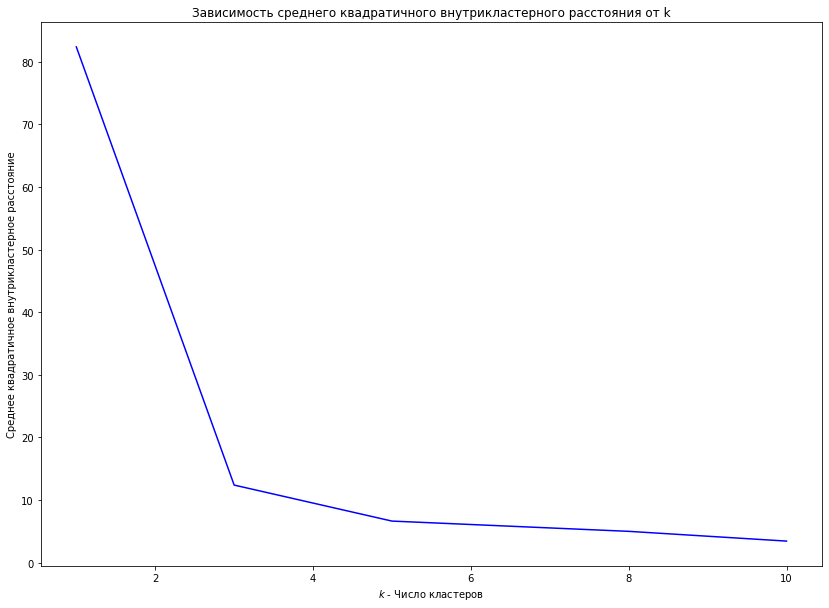

In [142]:
depend_k_from_metrics(list_k, list_sum)